In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn import svm
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
import seaborn as sns

In [7]:
batch_data = pd.read_csv("../../data/datasets/batch_meta_combine.csv")

X_train_scaled = pd.read_csv("../../data/datasets/X_train_scaled.csv",header=None)
X_train_scaled_oversample = pd.read_csv("../../data/datasets/X_train_scaled_oversample.csv",header=None)
X_val_scaled = pd.read_csv("../../data/datasets/X_val_scaled.csv",header=None)
X_test_scaled = pd.read_csv("../../data/datasets/X_test_scaled.csv",header=None)

X_test_herds = pd.read_csv("../../data/datasets/X_test_herds.csv")




y_train = pd.read_csv("../../data/datasets/y_train.csv")
y_train= y_train.replace("not_chronic",0)
y_train= y_train.replace("chronic",1)
y_train = pd.Series(list(y_train['group_class']))

y_train_oversample = pd.read_csv("../../data/datasets/y_train_oversample.csv")
y_train_oversample= y_train_oversample.replace("not_chronic",0)
y_train_oversample= y_train_oversample.replace("chronic",1)
y_train_oversample = pd.Series(list(y_train_oversample['group_class']))


y_val = pd.read_csv("../../data/datasets/y_val.csv")
y_val= y_val.replace("not_chronic",0)
y_val= y_val.replace("chronic",1)
y_val = pd.Series(list(y_val['group_class']))

y_test = pd.read_csv("../../data/datasets/y_test.csv")
y_test= y_test.replace("not_chronic",0)
y_test= y_test.replace("chronic",1)
y_test = pd.Series(list(y_test['group_class']))


num_features = 1600

# Subset X Data to top features
X_train_scaled = X_train_scaled.iloc[:, : num_features].values
X_train_scaled_oversample = X_train_scaled_oversample.iloc[:, : num_features].values
X_val_scaled = X_val_scaled.iloc[:, : num_features].values
X_test_scaled = X_test_scaled.iloc[:, : num_features].values


In [41]:
model = tf.keras.models.Sequential([
  #tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(200, activation='relu'),
  tf.keras.layers.Dense(25, activation='relu'),    
   # tf.keras.layers.Conv2D(200),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(2)
])


In [42]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [43]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [44]:
#model.fit(X_train_scaled_oversample, y_train_oversample, epochs=20)
model.fit(X_train_scaled_oversample, y_train_oversample, epochs=20)

Epoch 1/20
5/5 [==============================] - 0s 2ms/step - loss: 0.7405 - accuracy: 0.5820
Epoch 2/20
5/5 [==============================] - 0s 3ms/step - loss: 0.4307 - accuracy: 0.7754
Epoch 3/20
5/5 [==============================] - 0s 2ms/step - loss: 0.2801 - accuracy: 0.8845
Epoch 4/20
5/5 [==============================] - 0s 2ms/step - loss: 0.2169 - accuracy: 0.9225
Epoch 5/20
5/5 [==============================] - 0s 2ms/step - loss: 0.1666 - accuracy: 0.9347
Epoch 6/20
5/5 [==============================] - 0s 2ms/step - loss: 0.1578 - accuracy: 0.9504
Epoch 7/20
5/5 [==============================] - 0s 2ms/step - loss: 0.1094 - accuracy: 0.9634
Epoch 8/20
5/5 [==============================] - 0s 3ms/step - loss: 0.1197 - accuracy: 0.9330
Epoch 9/20
5/5 [==============================] - 0s 2ms/step - loss: 0.0699 - accuracy: 0.9773
Epoch 10/20
5/5 [==============================] - 0s 2ms/step - loss: 0.0866 - accuracy: 0.9769
Epoch 11/20
5/5 [======================

In [45]:
model.evaluate(X_test_scaled,  y_test, verbose=2)

2/2 - 0s - loss: 0.6727 - accuracy: 0.8056


[0.6726827025413513, 0.8055555820465088]

In [46]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

predictions = probability_model.predict(X_val_scaled)

y_pred = list()

for pred in predictions:
    y_pred.append(np.argmax(pred))

cf_matrix  = confusion_matrix(y_val, y_pred, labels=[0, 1])
cf_matrix

array([[19,  4],
       [ 7,  6]], dtype=int64)

In [47]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

predictions = probability_model.predict(X_test_scaled)

y_pred = list()

for pred in predictions:
    y_pred.append(np.argmax(pred))

cf_matrix  = confusion_matrix(y_test, y_pred, labels=[0, 1])


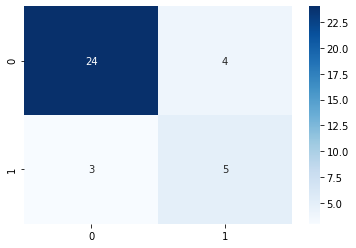

In [48]:

sns.heatmap(cf_matrix, annot=True, cmap='Blues')

In [10]:
oversample_test_df = pd.DataFrame({
    "actual":y_test,
    "nn_prediction":y_pred,
    "herd":X_test_herds['herdx']
})

oversample_test_df.to_csv("../../data/datasets/nn_predictions.csv",index=False)